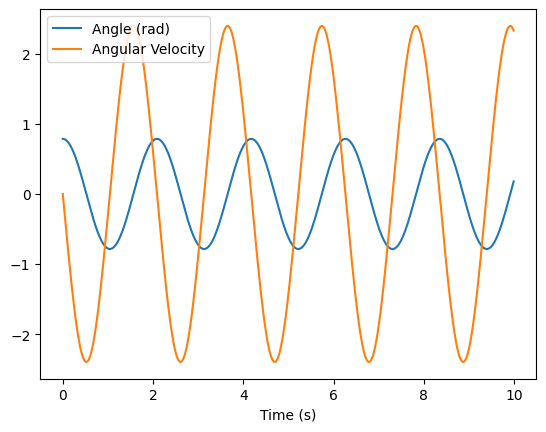

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pendulum_equations(t, y, g, L):
    theta, omega = y
    dydt = [omega, -g/L * np.sin(theta)]
    return dydt

def runge_kutta(h, t, y, g, L):
    k1 = h * np.array(pendulum_equations(t, y, g, L))
    k2 = h * np.array(pendulum_equations(t + h/2, y + k1/2, g, L))
    k3 = h * np.array(pendulum_equations(t + h/2, y + k2/2, g, L))
    k4 = h * np.array(pendulum_equations(t + h, y + k3, g, L))

    return y + (k1 + 2*k2 + 2*k3 + k4)/6

# Parameters
g = 9.8  # acceleration due to gravity (m/s^2)
L = 1.0  # length of the pendulum (m)
theta_0 = np.radians(45)  # initial angle in radians
omega_0 = 0.0  # initial angular velocity

# Time parameters
t_0 = 0.0
t_end = 10.0
h = 0.01  # time step

# Initial conditions
y_0 = [theta_0, omega_0]

# Arrays to store results
t_values = np.arange(t_0, t_end, h)
theta_values = []
omega_values = []

# Solve using RK method
for t in t_values:
    theta_values.append(y_0[0])
    omega_values.append(y_0[1])
    y_0 = runge_kutta(h, t, y_0, g, L)

# Plot results
plt.plot(t_values, theta_values, label='Angle (rad)')
plt.plot(t_values, omega_values, label='Angular Velocity')
plt.xlabel('Time (s)')
plt.legend()
plt.show()
